Simple Linear Regression - Train RMSE: 2.6385919145224626
Simple Linear Regression - Train R2: 0.7449667662402499
Simple Linear Regression - CV Score: 0.7395892032785966
Simple Linear Regression - Test RMSE: 2.378216743596622
Simple Linear Regression - Test R2: 0.783318827830567
Predicted Sales for Total Spend of 200: 13.957918518436085
Best degree for polynomial regression: 7
Final Polynomial Regression - Train R2: 0.7542489627871285
Final Polynomial Regression - Test R2: 0.7853578976318836
Predicted Sales for Total Spend of 200 using Polynomial Regression: 14.126662487142386


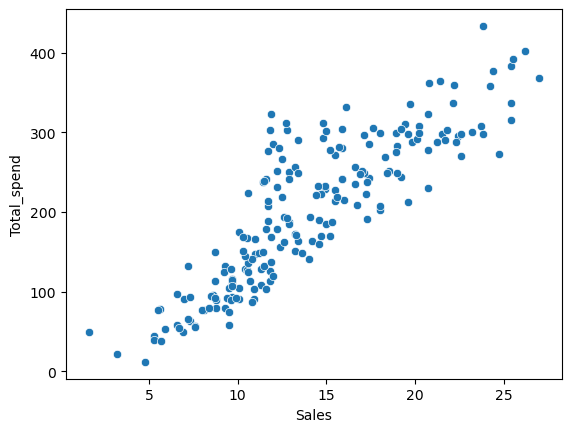

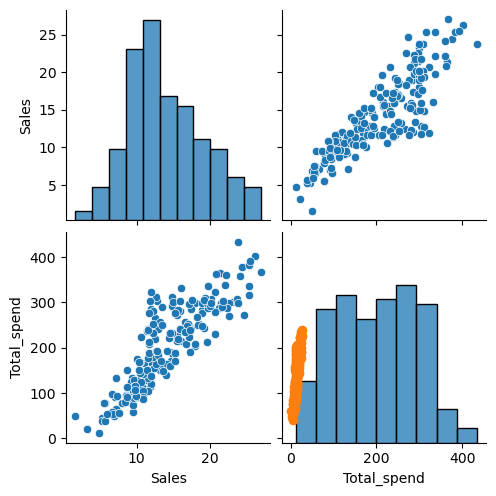

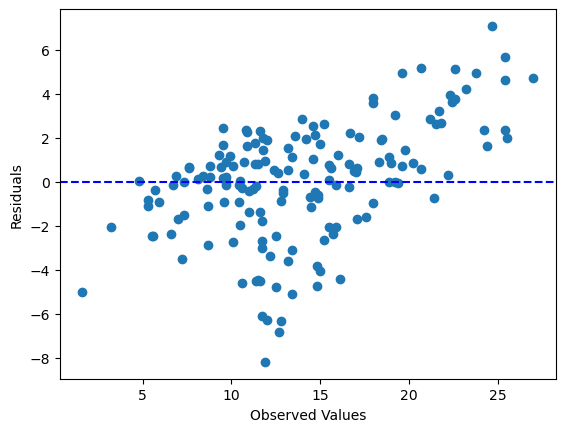

Residual skewness: -0.38524330118145295


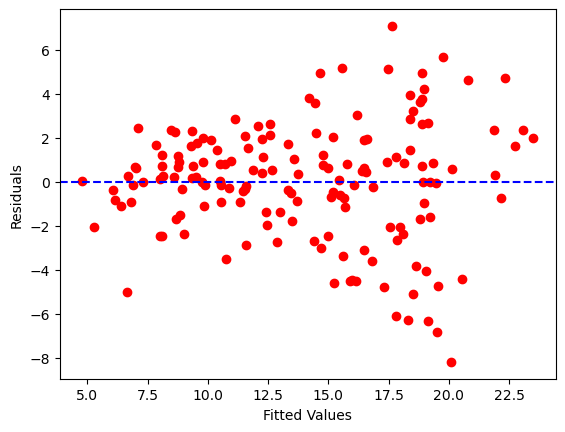

In [65]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from joblib import dump, load

# Load dataset
df = pd.read_csv("Advertising_SLR_SNLR_ONE_INPUT_27TH_FEB.csv")
df = df.drop("Unnamed: 0", axis=1)

# Create 'Total_spend' feature
df["Total_spend"] = df['TV'] + df['Radio'] + df['Newspaper']
df.drop(['TV', 'Radio', 'Newspaper'], axis=1, inplace=True)

# Data exploration
continous = ["Sales", "Total_spend"]
sns.scatterplot(x="Sales", y="Total_spend", data=df)
sns.pairplot(df)
df[continous].corr() * 100  # Correlation

# Check for null values
df.isnull().sum()

# Create x and y
x = df[["Total_spend"]]
y = df["Sales"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=54)

# Simple Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)

# Training evaluation
ypred_train = model.predict(x_train)
print("Simple Linear Regression - Train RMSE:", np.sqrt(mean_squared_error(y_train, ypred_train)))
print("Simple Linear Regression - Train R2:", r2_score(y_train, ypred_train))

# Cross-validation score
cv_score = cross_val_score(model, x_train, y_train, cv=5).mean()
print("Simple Linear Regression - CV Score:", cv_score)

# Test evaluation
ypred_test = model.predict(x_test)
print("Simple Linear Regression - Test RMSE:", np.sqrt(mean_squared_error(y_test, ypred_test)))
print("Simple Linear Regression - Test R2:", r2_score(y_test, ypred_test))

# Example prediction
sales = 0.04784052 * 200 + 4.389814518436085
print("Predicted Sales for Total Spend of 200:", sales)

# Save the simple linear regression model
dump(model, "sales_raj.joblib")

# Polynomial Regression (Non-linear)
train_r2 = []
test_r2 = []

# Loop to find the best polynomial degree
for degree in range(1, 10):
    polynomial_converter = PolynomialFeatures(degree=degree, include_bias=False)
    
    x_train_poly = polynomial_converter.fit_transform(x_train)
    x_test_poly = polynomial_converter.transform(x_test)
    
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Training evaluation
    train_pred = model.predict(x_train_poly)
    train_r2.append(r2_score(y_train, train_pred))

    # Test evaluation
    test_pred = model.predict(x_test_poly)
    test_r2.append(r2_score(y_test, test_pred))

# Finding the best degree for polynomial regression
best_degree = np.array(test_r2).argmax() + 1
print(f"Best degree for polynomial regression: {best_degree}")

# Final Polynomial Model with the best degree
final_poly_converter = PolynomialFeatures(degree=best_degree, include_bias=False)
x_train_poly = final_poly_converter.fit_transform(x_train)
x_test_poly = final_poly_converter.transform(x_test)

# Train the final model
final_model = LinearRegression()
final_model.fit(x_train_poly, y_train)

# Training and Test evaluations
train_pred = final_model.predict(x_train_poly)
test_pred = final_model.predict(x_test_poly)

print("Final Polynomial Regression - Train R2:", r2_score(y_train, train_pred))
print("Final Polynomial Regression - Test R2:", r2_score(y_test, test_pred))

# Save the final polynomial model
dump(final_model, "dt_raj.joblib")

# Example prediction with polynomial model
raj = load("dt_raj.joblib")
total_spend = 200
total_spend_poly = final_poly_converter.transform([[total_spend]])
predicted_sales = raj.predict(total_spend_poly)
print(f"Predicted Sales for Total Spend of {total_spend} using Polynomial Regression: {predicted_sales[0]}")

# Visualization of residuals (for Linear Regression assumptions)
error = y_train - ypred_train
plt.scatter(y_train, ypred_train)
plt.xlabel("Observed Values")
plt.ylabel("Fitted Values")
plt.show()

plt.scatter(y_train, error)
plt.xlabel("Observed Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="blue", linestyle='--')
plt.show()

# Normality check of residuals
print("Residual skewness:", pd.Series(error).skew())

# Residuals vs Fitted values for variance checking
plt.scatter(ypred_train, error, c="r")
plt.axhline(y=0, color="blue", linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

